# Implementing K-N-N from scratch

In [2]:
import numpy as np
import pandas as pd
from math import sqrt
from IPython.display import Image

Methods will include:
     - Calculating min & max values of dataset
     - Normalization
     - Euclidean Distance
     - Classification Prediction
     
The evaluation, accuracy metrics, cross validation splits and train test split methods will not be developed cause they are routine and no point in doing them everytime we are developing an algorithm from scratch. The point is to understand the core functionality that makes a technique different from any other.
        

In [3]:
def euclidean(x,y):
    distance = 0.0
    for i in range(len(x)-1):
        distance += ((x[i]-y[i])**2)
    return sqrt(distance)

In [4]:
dataset=[[1.465489372,2.362125076,0],
        [3.396561688,4.400293529,0],
        [1.38807019,1.850220317,0],
        [3.06407232,3.005305973,0],
        [7.627531214,2.759262235,1],
        [5.332441248,2.088626775,1],
        [6.922596716,1.77106367,1],
        [8.675418651,-0.242068655,1],
        [7.673756466,3.508563011,1]]

print(dataset[0])

[1.465489372, 2.362125076, 0]


In [5]:
try:
    row0 = dataset[0]
    for i in dataset:
        distance = euclidean(row0, i)
        print(distance)
except:
    print("Something's fucked! Dont be mad homie")

0.0
2.80769851166859
0.5177260009197887
1.7231219074407058
6.174826117844725
3.876611681862114
5.4890230596711325
7.66582710454398
6.313232155500879


In [6]:
def target_split(dataset):
    for i in range (len(dataset)-1):  
        target = dataset[i][2]
        print(target)
    return target

In [7]:
for i in range(len(dataset)-1):
    list = dataset[0]
    print(list)

[1.465489372, 2.362125076, 0]
[1.465489372, 2.362125076, 0]
[1.465489372, 2.362125076, 0]
[1.465489372, 2.362125076, 0]
[1.465489372, 2.362125076, 0]
[1.465489372, 2.362125076, 0]
[1.465489372, 2.362125076, 0]
[1.465489372, 2.362125076, 0]


In [8]:
target_split(dataset)

0
0
0
0
1
1
1
1


1

In [9]:
def min_max(dataset):
    values = []   ## you can also do values = list(), but be careful sometimes it doesnt allow you to append to it
    for i in range(len(dataset[0])):
        columns = [row[i] for row in dataset] #an elegant line of code 
        minimum = min(columns)
        maximum = max(columns)
        values.append([minimum,maximum])
    return values


In [10]:
data = min_max(dataset)
print(data)
print('Min X value:', data[0][0]) 
print('Max X value:', data[0][1])
print('Min y value:', data[1][0]) 
print('Max y value:', data[1][1]) 

[[1.38807019, 8.675418651], [-0.242068655, 4.400293529], [0, 1]]
Min X value: 1.38807019
Max X value: 8.675418651
Min y value: -0.242068655
Max y value: 4.400293529


Normalization formula is as follows:

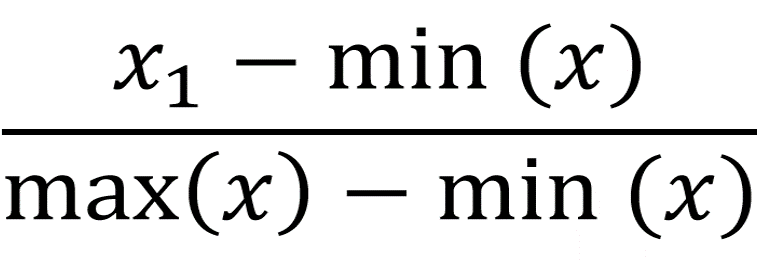

In [11]:
Image(filename='normal.png')

In [13]:
def find_neighbours(dataset,testset,num): ## this involves calculating the euc distance from the test set to all other train sets, then return the closer ones according to parameter num
    distances = []
    for i in dataset:
        dist = euclidean(testset, i)
        distances.append(dist)
        ditances = sorted(distances, key=float)
        #sorted(distances, key=lambda x: x[1])
        #distances.sort(key=lambda tup: tup[1]) ## sort the list from smallest euclidean value to largest, smaller values are closer to testset
    neighbours = []
    for i in range(num):
        neighbours.append(distances[i]) ## if num is 3, we will take the
    return neighbours 

In [14]:
# testing find_neighbours
print(find_neighbours(dataset,row0,6)) ## the 6 closest elements are as follows

[0.0, 2.80769851166859, 0.5177260009197887, 1.7231219074407058, 6.174826117844725, 3.876611681862114]


In [21]:
def predict_class(train,testdata,num):
    neighbours = find_neighbours(train,testdata,num)
    output = [row for row in neighbours]
    prediction = max(set(output), key=output.count)
    return prediction

In [32]:
classification = predict_class(dataset,row0,3) ## expected 0 classification
print(round(classification))

0


In [33]:
row3 = dataset[5] ## expected 3 classification
class2 = predict_class(dataset,row3,3)
print(round(class2))

3


In essence this is what the KNN does, a very simple and intuitive technique. It plots a point on a graph, takes the euclidean distance from that element to other elements in a graph and appends all the distances calculated to a list. The list is then sorted and we have a clear picture of which elements are closest to it. The user can then specify a value of 'k' which must be ODD and then from there we can see which class occurs most in the range specified by the user. The most occuring class will end up occupying the unclassified element and that's it. Very simple and also quite satisfying on how much it actually makes sense.